Import pandas and numpy Librarirs

In [37]:
import pandas as pd
import numpy as np

Load Dataset

In [38]:
df = pd.read_csv("/Social_Network_Ads.csv")

Basic Statistics

In [39]:
df.shape

(400, 5)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [41]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [42]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [43]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [44]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Data Preparation For Training and Testing

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [46]:
x = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [47]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

Linear Regression Model Building

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression(n_jobs=-1)

In [52]:
model.fit(x_train, y_train)

LogisticRegression(n_jobs=-1)

In [53]:
LogisticRegression(n_jobs=-1)

LogisticRegression(n_jobs=-1)

In [54]:
y_pred = model.predict(x_test)

Confusion Matrix Creating

In [55]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 9 19]]


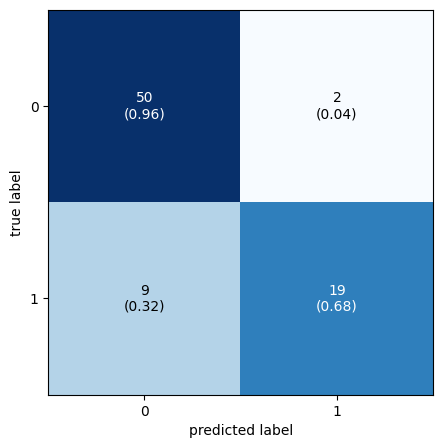

In [57]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()

Getting Accuracy,Error,Precision,Recall

In [58]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")
print(f"Error rate is {1-accuracy_score(y_test, y_pred)}")
print(f"Precision score is {precision_score(y_test, y_pred)}")
print(f"Recall score is {recall_score(y_test, y_pred)}")

Accuracy score is 0.8625
Error rate is 0.13749999999999996
Precision score is 0.9047619047619048
Recall score is 0.6785714285714286


Classification Report Of Each Row

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

